In [13]:
import pandas as pd

file_path = r"C:\Users\andre\OneDrive\Documents\hochschule\1.1. 6. Semester\Business Analytics Schwerpunkt\Menden\VS_code_projekt\THWS_Reihenanalysen\StockData_Samsung.csv"
df = pd.read_csv(file_path, sep= ";")

(df.head(5))


,Date,Open,High,Low,Close,Adj Close,Volume
0,"May 7, 2025","54,500.00","55,000.00","54,300.00","54,600.00","54,600.00","17,136,991"
1,"May 2, 2025","55,000.00","55,500.00","54,200.00","54,300.00","54,300.00","22,454,204"
2,"Apr 30, 2025","55,900.00","56,000.00","55,300.00","55,500.00","55,500.00","13,014,189"
3,"Apr 29, 2025","55,700.00","56,500.00","55,600.00","55,800.00","55,800.00","10,295,518"
4,"Apr 28, 2025","55,800.00","55,900.00","55,500.00","55,800.00","55,800.00","9,341,518"


In [14]:
# Drop rows where any column contains the word 'Dividend'
df = df[~df.apply(lambda row: row.astype(str).str.contains("Dividend").any(), axis=1)]

(df.head(5))

,Date,Open,High,Low,Close,Adj Close,Volume
0,"May 7, 2025","54,500.00","55,000.00","54,300.00","54,600.00","54,600.00","17,136,991"
1,"May 2, 2025","55,000.00","55,500.00","54,200.00","54,300.00","54,300.00","22,454,204"
2,"Apr 30, 2025","55,900.00","56,000.00","55,300.00","55,500.00","55,500.00","13,014,189"
3,"Apr 29, 2025","55,700.00","56,500.00","55,600.00","55,800.00","55,800.00","10,295,518"
4,"Apr 28, 2025","55,800.00","55,900.00","55,500.00","55,800.00","55,800.00","9,341,518"


In [17]:
#checking for missing values
print("Checking for missing values")
df.isnull().sum()




Checking for missing values


Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

In [18]:
#checking different data types
print("Checking different data types")
df.dtypes

Checking different data types


Date          object
Open          object
High          object
Low           object
Close         object
Adj Close     object
Volume        object
dtype: object

In [19]:
#Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.columns = df.columns.str.strip()


In [23]:
print(df.columns.tolist())


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [31]:
# OR Option 2: Fill missing volume with zeros
df['Volume'] = df['Volume'].fillna(0)

In [32]:
import pandas as pd
import numpy as np  # Make sure this import is included

# Assuming df is your dataframe
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in cols_to_convert:
    # Step 1: Convert to string
    df[col] = df[col].astype(str)
    
    # Step 2: Replace commas
    df[col] = df[col].str.replace(",", "", regex=False)
    
    # Step 3: Replace dashes and other non-numeric values with NaN
    df[col] = df[col].replace(['-', 'n/a', 'nan', 'null', 'None', 'NA'], np.nan)
    
    # Step 4: Convert to float, errors='coerce' will convert non-convertible values to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Optional: Check which rows have NaN values after conversion
print(f"Number of rows with NaN values: {df[cols_to_convert].isna().any(axis=1).sum()}")

# Show rows with NaN values
nan_rows = df[df[cols_to_convert].isna().any(axis=1)]
print("\nRows containing NaN values:")
print(nan_rows)

# Optionally, show index positions of rows with NaN values
nan_indices = df[df[cols_to_convert].isna().any(axis=1)].index.tolist()
print("\nIndices of rows with NaN values:")
print(nan_indices)

# Check which columns have NaN values and how many in each column
print("\nCount of NaN values in each column:")
print(df[cols_to_convert].isna().sum())

Number of rows with NaN values: 0

Rows containing NaN values:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Indices of rows with NaN values:
[]

Count of NaN values in each column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [34]:
#checking different data types
print("Checking different data types")
df.dtypes

Checking different data types


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
#readjusting order of data
df = df.sort_values('Date').reset_index(drop=True)


In [37]:
(df.head)

<bound method NDFrame.head of            Date     Open     High      Low    Close  Adj Close      Volume
0    2020-05-08  49100.0  49350.0  48800.0  48800.0   42933.67  15319700.0
1    2020-05-11  48900.0  49250.0  48300.0  48400.0   42581.76  16357743.0
2    2020-05-12  48400.0  48500.0  47550.0  47900.0   42141.87  23433590.0
3    2020-05-13  47250.0  48550.0  47200.0  48550.0   42713.73  20223277.0
4    2020-05-14  47750.0  48100.0  47650.0  48000.0   42229.84  19305974.0
...         ...      ...      ...      ...      ...        ...         ...
1221 2025-04-28  55800.0  55900.0  55500.0  55800.0   55800.00   9341518.0
1222 2025-04-29  55700.0  56500.0  55600.0  55800.0   55800.00  10295518.0
1223 2025-04-30  55900.0  56000.0  55300.0  55500.0   55500.00  13014189.0
1224 2025-05-02  55000.0  55500.0  54200.0  54300.0   54300.00  22454204.0
1225 2025-05-07  54500.0  55000.0  54300.0  54600.0   54600.00  17136991.0

[1226 rows x 7 columns]>

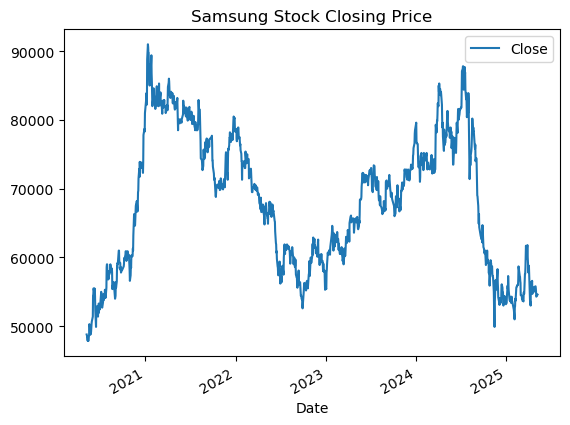

In [38]:
import matplotlib.pyplot as plt

df.plot(x='Date', y='Close', title='Samsung Stock Closing Price')
plt.show()


In [39]:
# Basic stock statistics
stats = {
    "Median Closing Price": df['Close'].median(),
    "Average Trading Volume": df['Volume'].mean(),
    "Max Price": df['High'].max(),
    "Min Price": df['Low'].min(),
    "Average Daily Range": (df['High'] - df['Low']).mean(),
    "Average Daily Return": ((df['Close'] - df['Open']) / df['Open'] * 100).mean(),
    "Volatility (Std Dev of Close)": df['Close'].std(),
    "Days with Positive Returns": (df['Close'] > df['Open']).sum(),
    "Days with Negative Returns": (df['Close'] < df['Open']).sum()
}

# Create a DataFrame for nicer display
stats_df = pd.DataFrame(list(stats.items()), columns=['Metric', 'Value'])

# Format values for better readability
stats_df['Value'] = stats_df['Value'].apply(lambda x: f"{x:.2f}" if isinstance(x, float) else x)

# Display statistics
print("Basic Stock Statistics:")
print(stats_df)

# Calculate monthly average closing prices if you have enough data
if len(df) > 30:
    print("\nMonthly Average Closing Prices:")
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_avg = df.groupby('Month')['Close'].mean()
    print(monthly_avg.tail(6))  # Show last 6 months

Basic Stock Statistics:
                          Metric        Value
0           Median Closing Price     68600.00
1         Average Trading Volume  17401476.70
2                      Max Price     96800.00
3                      Min Price     47200.00
4            Average Daily Range      1232.10
5           Average Daily Return        -0.07
6  Volatility (Std Dev of Close)      9872.42
7     Days with Positive Returns       519.00
8     Days with Negative Returns       636.00

Monthly Average Closing Prices:
Month
2024-12    54035.000000
2025-01    54361.111111
2025-02    55665.000000
2025-03    57260.000000
2025-04    55686.363636
2025-05    54450.000000
Freq: M, Name: Close, dtype: float64


In [40]:
import pandas as pd

# Assuming your cleaned data is in a DataFrame called 'df'

# Specify the file path where you want to save the CSV
file_path = r"C:\Users\andre\OneDrive\Documents\hochschule\1.1. 6. Semester\Business Analytics Schwerpunkt\Menden\VS_code_projekt\THWS_Reihenanalysen\StockData_Samsung_final.csv"

# Save the cleaned and modified data to the specified file path
df.to_csv(file_path, index=False)
